# Simple circuit model
<img src="SimpleCircuitModel.png">

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import special
import time
import matplotlib.cm as cm
from sklearn.linear_model import LinearRegression
from sympy import *

In [122]:
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

In [145]:
def circuit1(U, R_s, R_el, R_ct, I_1, I_2, I_3, Dphi_elpn,I):
    f1 = R_s*(I_2 + I_3) + R_s*(I_3) - U + R_ct*I_3 - Dphi_elpn
    f2 = R_s*(I_2 + I_3) - U + R_ct*I_2 + R_el*(I_1 + I_2)- Dphi_elpn
    f3 = -U + R_ct*I_1 + R_el*(I_1 + I_2) + R_el*(I_1)- Dphi_elpn
    f4 = I_1 + I_2 + I_3 - I
    s = solve([f1,f2,f3,f4],[I_1,I_2,I_3,Dphi_elpn])
    return float(s[I_1]), float(s[I_2]), float(s[I_3]), float(s[Dphi_elpn])

In [165]:
I_1 = Symbol('I_1')
I_2 = Symbol('I_2')
I_3 = Symbol('I_3')
Dphi_elpn = Symbol('Dphi_elpn')
circuit1(U=4000, R_s=5, R_el=5, R_ct=5, I_1=I_1, I_2=I_2, I_3=I_3, Dphi_elpn=Dphi_elpn,I=100)

(40.0, 20.0, 40.0, -3300.0)

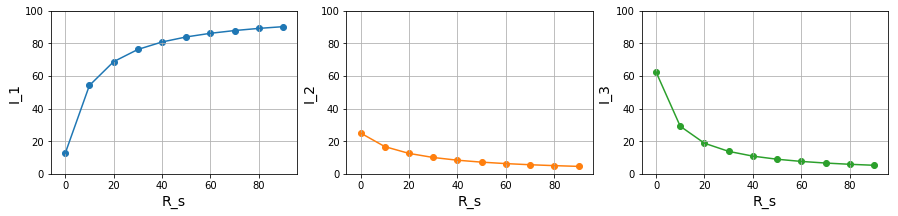

In [174]:
I_1 = Symbol('I_1')
I_2 = Symbol('I_2')
I_3 = Symbol('I_3')
Dphi_elpn = Symbol('Dphi_elpn')

I_1_list = []
I_2_list = []
I_3_list = []
Dphi_elpn_list = []

for ii in range(0,100,10):
    I_1_rlt, I_2_rlt, I_3_rlt, Dphi_elpn_rlt = circuit1(U=4000, R_s=ii, R_el=5, R_ct=5, I_1=I_1, I_2=I_2, I_3=I_3, Dphi_elpn=Dphi_elpn,I=100)
    I_1_list.append(I_1_rlt)
    I_2_list.append(I_2_rlt)
    I_3_list.append(I_3_rlt)
    Dphi_elpn_list.append(Dphi_elpn_rlt)
    

fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(15,3))
ax1.plot(np.arange(0,100,10), I_1_list,color = new_colors[0])
ax1.scatter(np.arange(0,100,10), I_1_list,color = new_colors[0])
ax2.plot(np.arange(0,100,10), I_2_list,color = new_colors[1])
ax2.scatter(np.arange(0,100,10), I_2_list,color = new_colors[1])
ax3.plot(np.arange(0,100,10), I_3_list,color = new_colors[2])
ax3.scatter(np.arange(0,100,10), I_3_list,color = new_colors[2])

ax1.set_xlabel("R_s", size=14)
ax1.set_ylabel("I_1", size=14)
ax2.set_xlabel("R_s", size=14)
ax2.set_ylabel("I_2", size=14)
ax3.set_xlabel("R_s", size=14)
ax3.set_ylabel("I_3", size=14)

ax1.set_ylim(0,100)
ax2.set_ylim(0,100)
ax3.set_ylim(0,100)

ax1.grid()
ax2.grid()
ax3.grid()
plt.show()

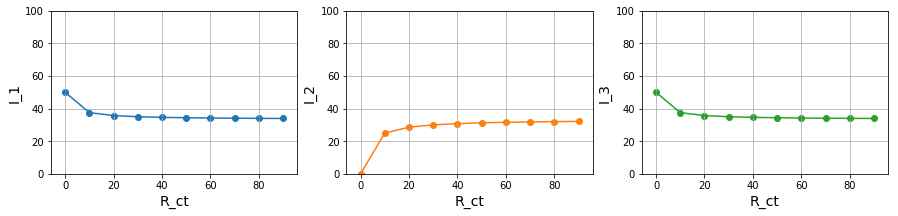

In [173]:
I_1 = Symbol('I_1')
I_2 = Symbol('I_2')
I_3 = Symbol('I_3')
Dphi_elpn = Symbol('Dphi_elpn')

I_1_list = []
I_2_list = []
I_3_list = []
Dphi_elpn_list = []

for ii in range(0,100,10):
    I_1_rlt, I_2_rlt, I_3_rlt, Dphi_elpn_rlt = circuit1(U=4000, R_s=5, R_el=5, R_ct=ii, I_1=I_1, I_2=I_2, I_3=I_3, Dphi_elpn=Dphi_elpn,I=100)
    I_1_list.append(I_1_rlt)
    I_2_list.append(I_2_rlt)
    I_3_list.append(I_3_rlt)
    Dphi_elpn_list.append(Dphi_elpn_rlt)
    

fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(15,3))
ax1.plot(np.arange(0,100,10), I_1_list,color = new_colors[0])
ax1.scatter(np.arange(0,100,10), I_1_list,color = new_colors[0])
ax2.plot(np.arange(0,100,10), I_2_list,color = new_colors[1])
ax2.scatter(np.arange(0,100,10), I_2_list,color = new_colors[1])
ax3.plot(np.arange(0,100,10), I_3_list,color = new_colors[2])
ax3.scatter(np.arange(0,100,10), I_3_list,color = new_colors[2])

ax1.set_xlabel("R_ct", size=14)
ax1.set_ylabel("I_1", size=14)
ax2.set_xlabel("R_ct", size=14)
ax2.set_ylabel("I_2", size=14)
ax3.set_xlabel("R_ct", size=14)
ax3.set_ylabel("I_3", size=14)

ax1.set_ylim(0,100)
ax2.set_ylim(0,100)
ax3.set_ylim(0,100)

ax1.grid()
ax2.grid()
ax3.grid()
plt.show()